## Step 0: Import libraries and dataset

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\startup_funding2021.csv")

## Step 1: Understanding the dataset


In [3]:
#Preview of dataset
df.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [4]:
#Dataset dimensions-(rows, columns)
df.shape

(1209, 9)

In [5]:
#Features of data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


## Step 2: Data Preprocessing and Cleaning

In [6]:
#Finding missing values
missing_values= df.isnull().sum()
missing_values

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
dtype: int64

In [7]:
#Renaming columns
df.rename(columns = {'Company/Brand':'Startup'}, inplace = True)
df.rename(columns = {'Amount($)' : 'Amount'}, inplace = True)
df.rename(columns = {'HeadQuarter' : 'City'}, inplace = True)
df.rename(columns = {'Founded' : 'Year_Founded'}, inplace = True)
df.rename(columns = {'Sector' : 'Industry'}, inplace = True)
df.rename(columns = {'Stage':'Funding'}, inplace = True)

In [8]:
# Replacing the commas,$ in 'Amount'
df['Amount']=df['Amount'].str.replace(',', '')
df['Amount']=df['Amount'].str.replace('$', '')

In [9]:
# Fixing the faulty values in 'Amount' 
df['Amount']=df['Amount'].str.replace('Undisclosed', '0')
df['Amount']=df['Amount'].str.replace('Upsparks', '0')
df['Amount']=df['Amount'].str.replace('Series C', '0')
df['Amount']=df['Amount'].str.replace('Seed', '0')
df['Amount']=df['Amount'].str.replace('undisclosed', '0')
df['Amount']=df['Amount'].str.replace('ah! Ventures', '0')
df['Amount']=df['Amount'].str.replace('Pre-series A', '0')
df['Amount']=df['Amount'].str.replace('ITO Angel Network LetsVenture', '0')
df['Amount']=df['Amount'].str.replace('J0', '0')

In [10]:
# Converting to numeric data-type
df['Amount'] = pd.to_numeric(df['Amount'])

In [11]:
# Replacing 0 in 'Amount' with null values
df['Amount'] = df['Amount'].replace(0, np.nan)

In [12]:
# Replacing null values with mean
df['Amount'].fillna(df['Amount'].mean(), inplace = True)

In [13]:
# Replacing null values in 'Investor' with 'Undisclosed Investor'
df['Investor'] = df['Investor'].replace(np.nan, 'Undisclosed Investor')

In [14]:
df.isnull().sum()

Startup           0
Year_Founded      1
City              1
Industry          0
What it does      0
Founders          4
Investor          0
Amount            0
Funding         428
dtype: int64

In [15]:
# Replacing null values in 'Industry' with 'Undisclosed Industry'
df['Industry'] = df['Industry'].replace(np.nan, 'Undisclosed Industry')

In [16]:
df[pd.isnull(df.Year_Founded)]

,Startup,Year_Founded,City,Industry,What it does,Founders,Investor,Amount,Funding
137,Smart Express,NaN,Mumbai,Logistics,India’s Most Innovative and Awarded Express Lo...,Yogesh Dhingra,"IIFL India Private Equity Fund, Smiti Holding ...",10000000.0,Seed


In [17]:
#Replacing null 'Year_Founded' year of Smart Express with the correct year and converting 'Year_Founded' to int64
df['Year_Founded'] = df['Year_Founded'].replace(np.nan,2018)
df.Year_Founded=df.Year_Founded.astype('int64')

In [18]:
df.dtypes

Startup          object
Year_Founded      int64
City             object
Industry         object
What it does     object
Founders         object
Investor         object
Amount          float64
Funding          object
dtype: object

In [19]:
# Replacing null values in 'Founders' with 'Undisclosed Founder'
df['Founders'] = df['Founders'].replace(np.nan, 'Undisclosed Founder')

In [20]:
# Replacing null values in 'Funding' with 'Unknown'
df['Funding'] = df['Funding'].replace(np.nan, 'Unknown')


In [21]:
df['Funding'].value_counts().head(10)


Unknown         428
Seed            246
Pre-series A    157
Series A        126
Series B         49
Pre-seed         47
Series C         45
Debt             27
Series D         21
Series E         18
Name: Funding, dtype: int64

In [22]:
# Replacing with a common word, as both HealthCare and Healthcare exist in 'Industry'
df['Industry'] = df['Industry'].replace('HealthCare', 'Healthcare')

In [23]:
# Replacing null values in 'City' with 'Unknown'
df['City'] = df['City'].replace(np.nan, 'Unknown')

In [24]:
df.isnull().sum()

Startup         0
Year_Founded    0
City            0
Industry        0
What it does    0
Founders        0
Investor        0
Amount          0
Funding         0
dtype: int64

## Step 3: Exploratory Data Analysis


## Q1: Did cities play a major role in receiving funding in 2021?

In [25]:
# Selecting top 10 cities 
cities = df['City'].value_counts().head(10)
cities

Bangalore    426
Mumbai       203
Gurugram     155
New Delhi    144
Pune          47
Chennai       40
Noida         34
Hyderabad     34
Jaipur        11
Ahmedabad     11
Name: City, dtype: int64

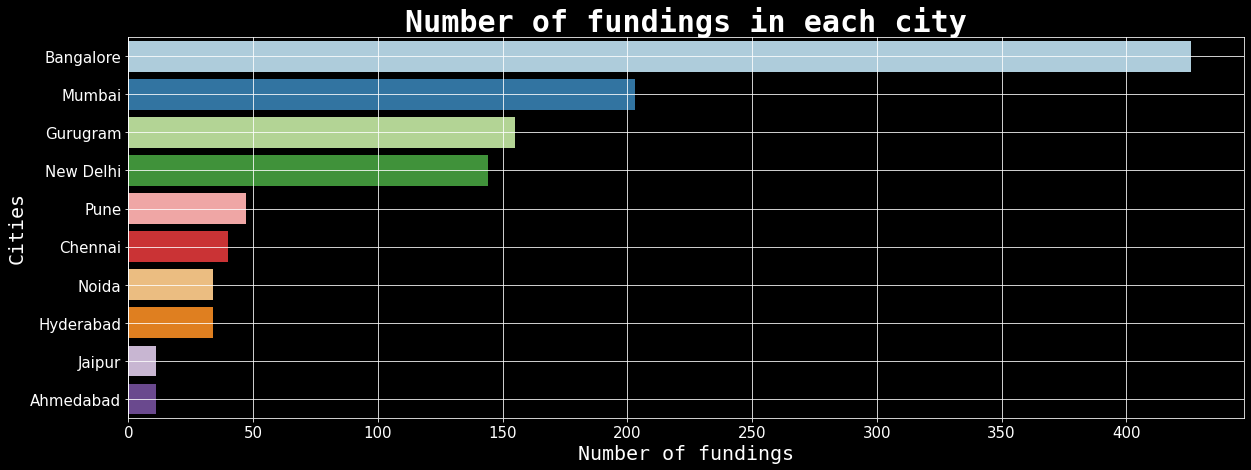

In [26]:
#Plotting a graph of Number of fundings in each city
plt.style.use("dark_background")
plt.figure(figsize = (20, 7))
sns.barplot(cities.values, cities.index,palette = 'Paired')
plt.title('Number of fundings in each city', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Number of fundings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Cities', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.grid()
plt.show()

## Q2: Which industries were favoured by investors for funding in 2021?


In [27]:
#Selecting the most frequent industries
industry = df['Industry'].value_counts().head(10)
industry

FinTech                              122
EdTech                               102
Financial Services                    61
Healthcare                            52
Food & Beverages                      37
E-commerce                            37
Information Technology & Services     36
Automotive                            33
E-learning                            25
Consumer Goods                        24
Name: Industry, dtype: int64

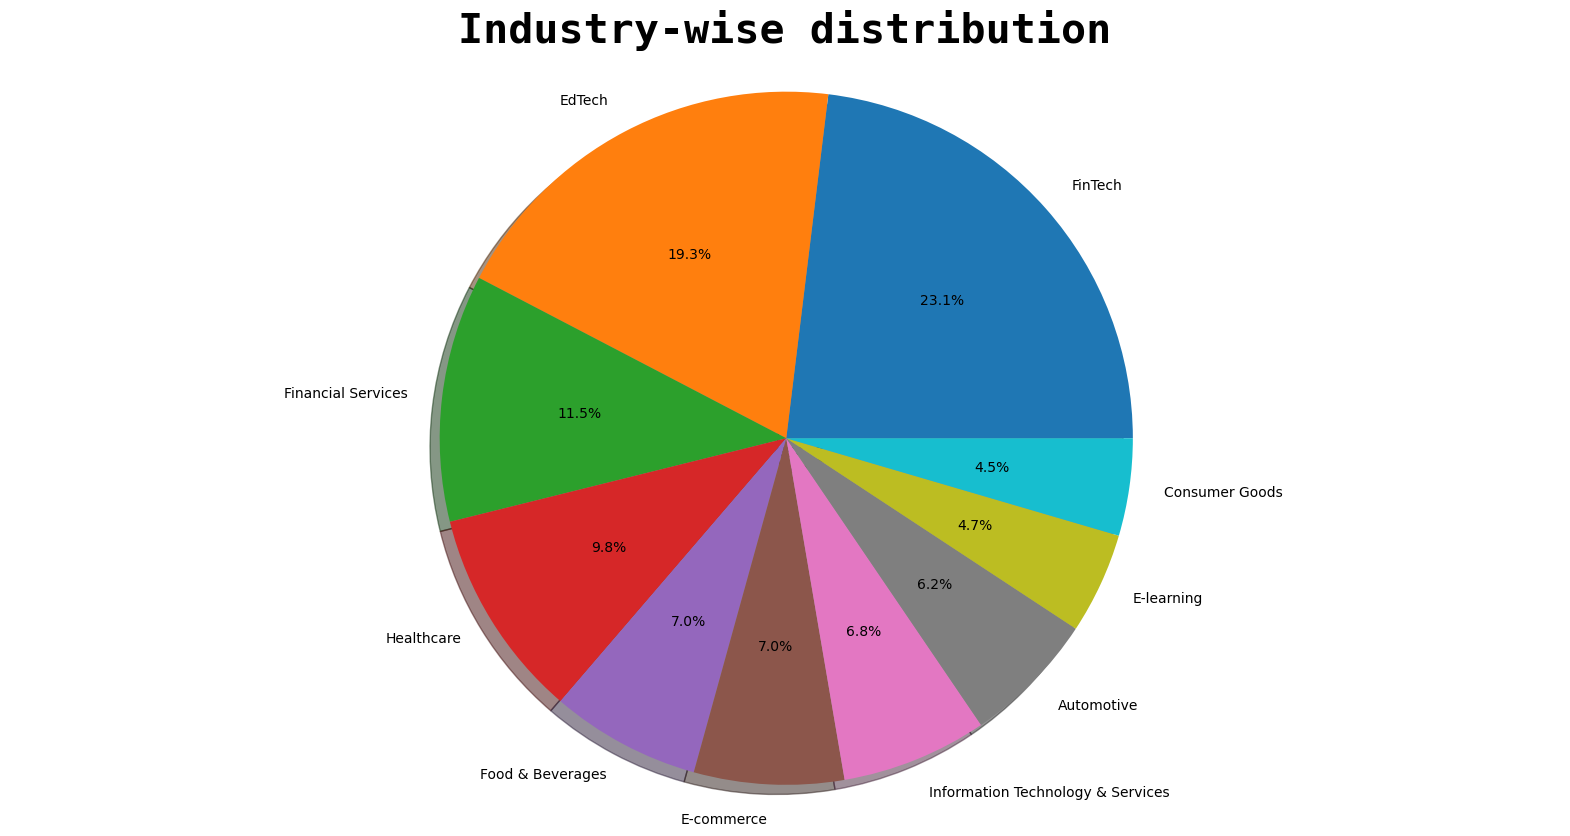

In [28]:
#Plotting a pie chart of top 10 industries
plt.style.use('default')
plt.figure(figsize = (20, 10))
plt.pie(industry.values, labels = industry.index, shadow = True,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Industry-wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

## Q3: Who were the most important investors in the Indian Ecosystem in 2021?

In [29]:
#Selecting the most frequent investors
investors = df['Investor'].value_counts().head(10)
investors

Undisclosed Investor         62
Inflection Point Ventures    24
Tiger Global                 11
Venture Catalysts            11
Elevation Capital             7
Titan Capital                 6
We Founder Circle             6
Anicut Angel Fund             5
Sequoia Capital India         5
Sixth Sense Ventures          5
Name: Investor, dtype: int64

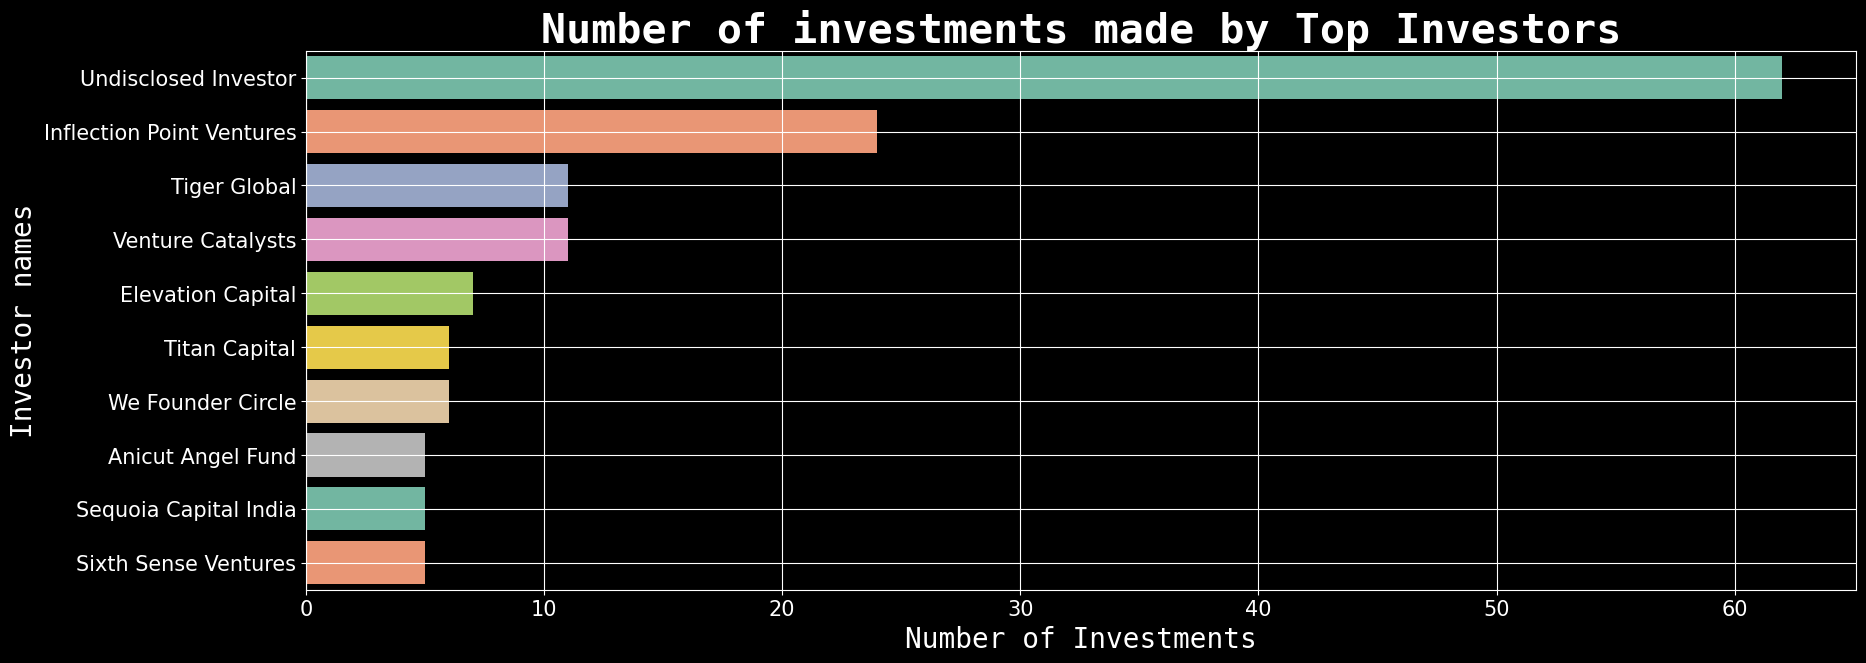

In [30]:
#Plotting a graph of number of investements made by top investors
plt.style.use("dark_background")
plt.figure(figsize = (20, 7))
sns.barplot(investors.values, investors.index, palette = 'Set2')
plt.title('Number of investments made by Top Investors', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Number of Investments', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Investor names', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.grid()
plt.show()

## Q4: How much funding did Startups generally receive in India in 2021?

In [31]:
#Highest amount funded in 2021 to a startup(in USD)
df.Amount.sort_values(ascending = False).head(1)

73    1.500000e+11
Name: Amount, dtype: float64

In [32]:
# Details of top 5 Highest Funded Startups
df.sort_values(by = 'Amount', ascending = False).head(5)

,Startup,Year_Founded,City,Industry,What it does,Founders,Investor,Amount,Funding
73,Alteria Capital,2018,Mumbai,FinTech,Alteria Capital is a Venture debt firm .,Vinod Murali,Undisclosed Investor,1.500000e+11,Debt
346,VerSe Innovation,2007,Bangalore,Innovation Management,Owner of Dailyhunt App and I-Pay,Virendra Gupta,"Canaan Valley Capital, Glade Brook Capital Par...",1.000000e+09,Series H
935,Dream Sports,2008,Mumbai,Sports,Dream Sports is India’s leading sports technol...,Harsh Jain,"Falcon Edge, DST Global, D1 Capital, Redbird C...",8.400000e+08,Unknown
53,Swiggy,2014,Bangalore,Food delivery,Swiggy is an on-demand food delivery platform ...,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Carmignac, Falcon Edge Capital",8.000000e+08,Unknown
532,OYO,2013,Gurugram,Hospitality,OYO is a global platform that empowers entrepr...,Ritesh Agarwal,"SoftBank Vision Fund, Hindustan Media Venture",6.600000e+08,Unknown


In [33]:
# Calculating average funding received by a startup(in USD)
df['Amount'].mean() 

170277852.27272826

In [34]:
# Details of least funded startups 
df.sort_values(by = 'Amount').head(5)

,Startup,Year_Founded,City,Industry,What it does,Founders,Investor,Amount,Funding
308,Glii,2020,Noida,Dating,India’s finest dating companionship application,Shivam Kaushik,We Founder Circle,10000.0,Seed
197,UrbanMatrix Technologies,2019,Chennai,Drone,Helping Industries & Organizations to seamless...,"Rishabh Verma, Ashutosh Kumar, Divyanshu Pundir",SARA ELGI,100000.0,Unknown
41,Puresh Daily,2019,Ranchi,Milk startup,PUREandFRES-Milk delivers fresh milk directly ...,"Manish Piyush, Ayush Kumar","Alfa Ventures, Agility Venture Partners",100000.0,Seed
44,Dybo,2019,Bangalore,IT,Product Visualisation Technology for Commerce,Dhawal Jain,Spanache,100000.0,Seed
11,FreeStand,2017,New Delhi,B2B service,FreeStand enables FMCG brands to execute track...,"Konark Sharma, Sneh Soni","SucSEED Indovation, IIM Calcutta Innovation Park",100000.0,Unknown


## Q5: Which Startups were funded the most number of times in 2021?

In [35]:
#Startups that were funded the most number of times in 2021
df.Startup.value_counts().head(5)

BharatPe    8
BYJU'S      4
Zetwerk     3
Siply       3
Bewakoof    3
Name: Startup, dtype: int64

## Q6: What were the different types of fundings startups received in 2021?

In [36]:
#Preview of types of funding sorted by frequency
funding=df['Funding'].value_counts().head(10)

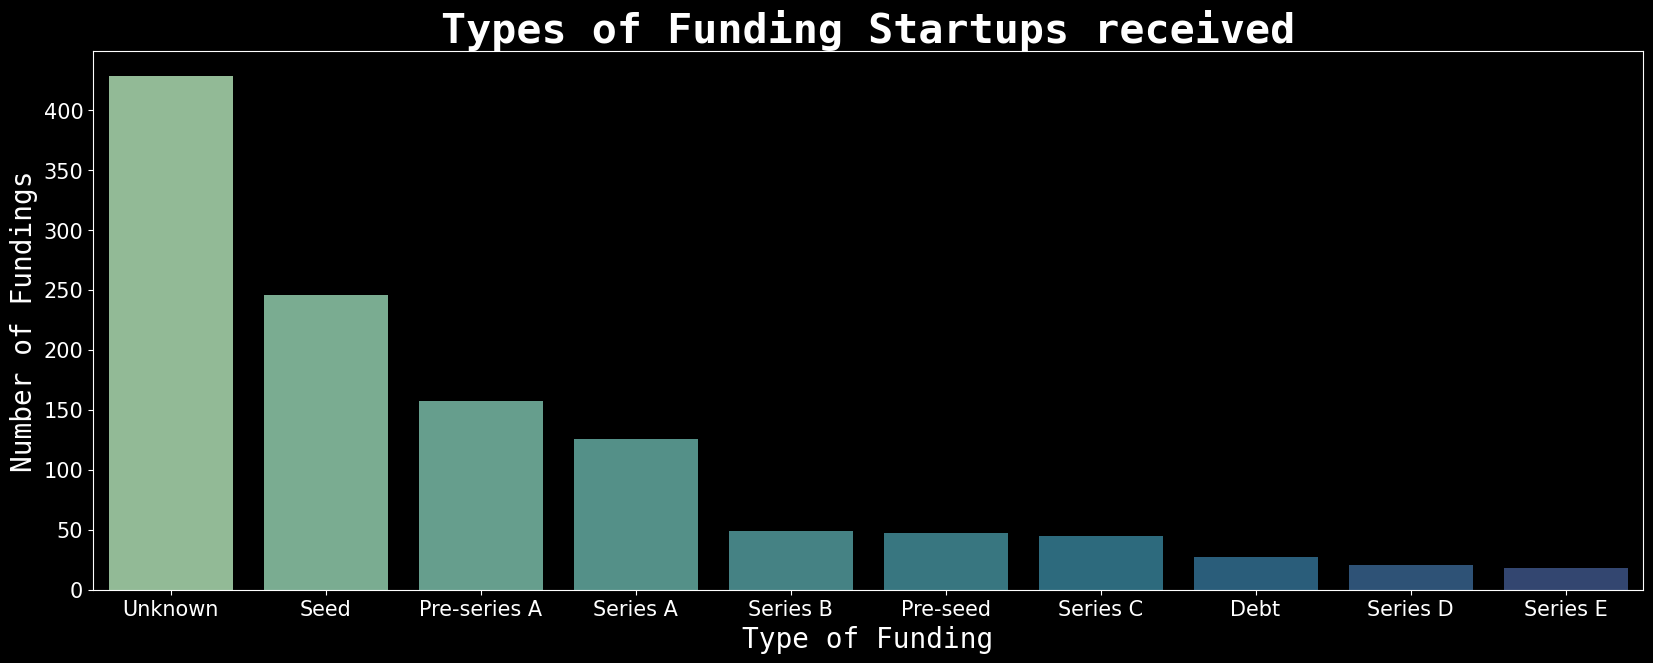

In [37]:
#Plotting a graph of types of funding startups received
plt.style.use("dark_background")
plt.figure(figsize = (20,7))
sns.barplot(x=funding.index,y=funding.values,palette='crest')
plt.title('Types of Funding Startups received', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Type of Funding', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of Fundings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

# Conclusions:

- __Several startups were funded in metropolitan cities like Bangalore and Mumbai. This may be because there is a wide range of talent available in these regions and the fact that there are many networking opportunities here.__
-  __Startups in the Financial sector (both technology and services) were the most successful in receiving funding in 2021. Edtech startups also performed pretty well.__
- __Most startup investors chose to remain hidden. The top known investors in 2021 were Inflection Point Ventures, Tiger Global, and Venture Catalysts.__
- __Alteria Capital received the highest funding in 2021, while BharatPe managed to get funded the most number of times.__
- __Most of the types of funding startups received were unknown. Amongst the known ones, Seed-Funding was the most popular.__

